<a href="https://colab.research.google.com/github/ShivaShirsath/dl/blob/master/char.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import *

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/letter-recognition/letter-recognition.data"
df = pd.read_csv(url, header=None)

In [3]:
# Preprocess data
X = df.iloc[:, 1:]
X = X / 15.0
y = df.iloc[:, 0]
y = pd.get_dummies(y)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
# Define neural network architecture
mmodel = Sequential()
mmodel.add(Dense(64, input_dim=16, activation='relu'))
mmodel.add(Dense(32, activation='relu'))
mmodel.add(Dense(26, activation='softmax'))

# Compile model
mmodel.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [6]:
# Train model
history = mmodel.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32)

# Evaluate model
test_loss, test_acc = mmodel.evaluate(X_test, y_test)
print("Test accuracy:", test_acc)

# Visualize results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

Epoch 1/100
438/438 [==============================] - 3s 5ms/step - loss: 2.6572 - accuracy: 0.2809 - val_loss: 1.9956 - val_accuracy: 0.4548
Epoch 2/100
438/438 [==============================] - 2s 5ms/step - loss: 1.6899 - accuracy: 0.5354 - val_loss: 1.4950 - val_accuracy: 0.5823
Epoch 3/100
438/438 [==============================] - 2s 5ms/step - loss: 1.3862 - accuracy: 0.6121 - val_loss: 1.3100 - val_accuracy: 0.6413
Epoch 4/100
438/438 [==============================] - 2s 5ms/step - loss: 1.2396 - accuracy: 0.6506 - val_loss: 1.2028 - val_accuracy: 0.6655
Epoch 5/100
438/438 [==============================] - 4s 10ms/step - loss: 1.1505 - accuracy: 0.6754 - val_loss: 1.1312 - val_accuracy: 0.6832
Epoch 6/100
438/438 [==============================] - 2s 5ms/step - loss: 1.0889 - accuracy: 0.6891 - val_loss: 1.0806 - val_accuracy: 0.6975
Epoch 7/100
438/438 [==============================] - 2s 5ms/step - loss: 1.0398 - accuracy: 0.7036 - val_loss: 1.0261 - val_accuracy: 0.716

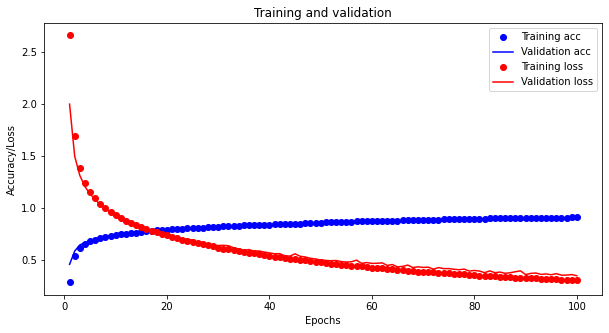

In [7]:
plt.figure(figsize=(10, 5))
# Plot training and validation Accuracy
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
# Plot training and validation loss
plt.plot(epochs, loss, 'bo', label='Training loss',color='red')
plt.plot(epochs, val_loss, 'b', label='Validation loss',color='red')
plt.title('Training and validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy/Loss')
plt.legend()
plt.show()

In [8]:
# Make predictions on test data 
y_pred = mmodel.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(np.array(y_test), axis=1)

188/188 [==============================] - 0s 1ms/step


In [9]:
# Calculate prediction accuracy
test_acc = np.mean(y_pred == y_true)
print("Test accuracy:", test_acc)

Test accuracy: 0.891


In [10]:
# Create a confusion matrix
conf_mat = np.zeros((26, 26), dtype=np.int)
for i in range(len(y_true)):
  conf_mat[y_true[i], y_pred[i]] += 1

<ipython-input-10-39721b35542c>:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  conf_mat = np.zeros((26, 26), dtype=np.int)


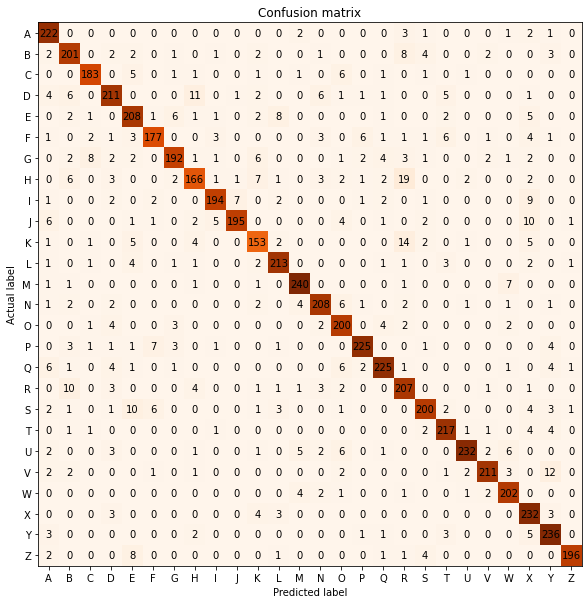

In [11]:
# Visualize prediction accuracy
plt.figure(figsize=(10, 10))
plt.imshow(conf_mat, cmap='Oranges')
plt.xticks(range(26), [chr(ord('A')+i) for i in range(26)])
plt.yticks(range(26), [chr(ord('A')+i) for i in range(26)])
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.title('Confusion matrix')
for i in range(26):
    for j in range(26):
        plt.text(j, i, conf_mat[i, j], ha='center', va='center', color='white' if conf_mat[i, j] > len(y_true)*0.05 else 'black')
plt.show()

***

In [17]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [13]:
# Load the dataset
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 0s 0us/step


In [14]:
# Pad the sequences to the same length
maxlen = 100
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

In [15]:
bmodel = Sequential([
    Embedding(input_dim=10000, output_dim=32, input_length=maxlen),
    Conv1D(32, 7, activation='relu'),
    MaxPooling1D(5),
    Conv1D(32, 7, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(1, activation='sigmoid')
])

In [18]:
bmodel.compile(
  optimizer='rmsprop',
  loss='binary_crossentropy',
  metrics=['acc']
)
history = bmodel.fit(
  X_train, y_train,
  epochs=16,
  batch_size=128,
  validation_split=0.2
)

Epoch 1/16
157/157 [==============================] - 8s 45ms/step - loss: 0.6385 - acc: 0.6164 - val_loss: 0.4931 - val_acc: 0.7568
Epoch 2/16
157/157 [==============================] - 5s 35ms/step - loss: 0.4063 - acc: 0.8158 - val_loss: 0.4764 - val_acc: 0.7754
Epoch 3/16
157/157 [==============================] - 10s 65ms/step - loss: 0.3198 - acc: 0.8663 - val_loss: 0.4131 - val_acc: 0.8110
Epoch 4/16
157/157 [==============================] - 12s 79ms/step - loss: 0.2712 - acc: 0.8888 - val_loss: 0.4018 - val_acc: 0.8256
Epoch 5/16
157/157 [==============================] - 12s 76ms/step - loss: 0.2321 - acc: 0.9109 - val_loss: 0.4632 - val_acc: 0.8062
Epoch 6/16
157/157 [==============================] - 5s 35ms/step - loss: 0.1992 - acc: 0.9272 - val_loss: 0.4402 - val_acc: 0.8250
Epoch 7/16
157/157 [==============================] - 7s 43ms/step - loss: 0.1648 - acc: 0.9408 - val_loss: 0.4861 - val_acc: 0.8176
Epoch 8/16
157/157 [==============================] - 5s 34ms/step

In [20]:
score = bmodel.evaluate(X_test, y_test)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

782/782 [==============================] - 3s 4ms/step - loss: 1.0870 - acc: 0.8014
Test loss: 1.0869853496551514
Test accuracy: 0.8014400005340576


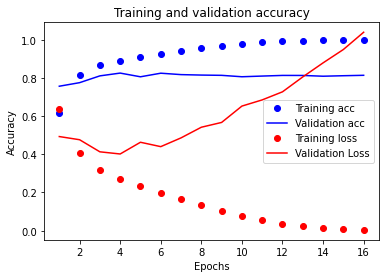

In [21]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# Plot the training and validation accuracy
# Plot the training and validation loss
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.plot(epochs, loss, 'bo', label='Training loss', color='red')
plt.plot(epochs, val_loss, 'b', label='Validation Loss', color='red')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()